In [12]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

import exoarch

from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

In [43]:
kic = exoarch.KICatalog().df

In [26]:
kic_tgas = pd.read_csv("data/kic_tgas.csv")

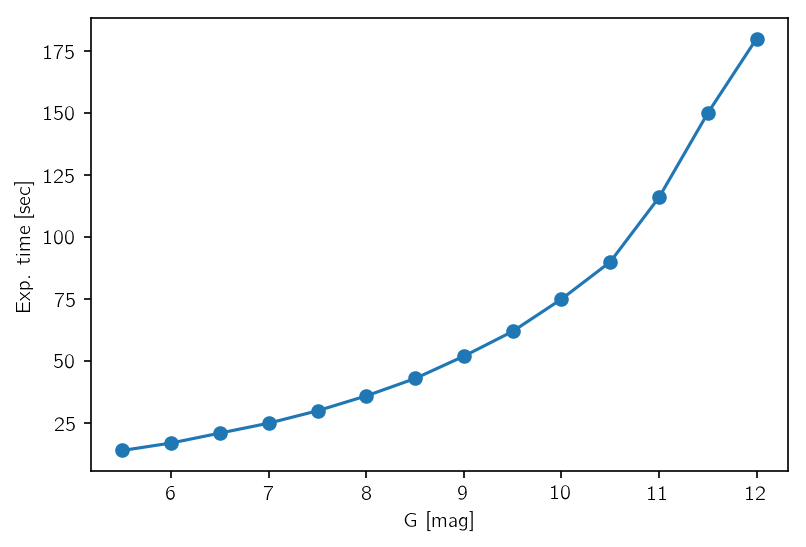

In [24]:
# return exptime in seconds given G mag
mag2exp = interpolate.interp1d(
    np.linspace(5.5, 12.0, 14), [14, 17, 21, 25, 30, 36, 43, 52, 62, 75, 90, 116, 150, 180],
    fill_value='extrapolate')

mags = np.linspace(5.5, 12.0, 14)
plt.plot(mags, mag2exp(mags), 'o-');
plt.xlabel('G [mag]')
plt.ylabel('Exp. time [sec]');

In [81]:
# targets = pd.read_csv("data/targets-top.list", delim_whitespace=True, header=None)
targets = pd.read_csv("data/targets-small-sep.csv")

12069449
12069449 6.020773457848183 17.16618766278546 295.46567149752116 50.51684681362882

12069424
12069424 5.777641776050088 15.66585065630053 295.45300263632566 50.524398336427595

4386086
4386086 9.746068280752123 68.3977752995552 296.4392146999741 39.496070037972395
c


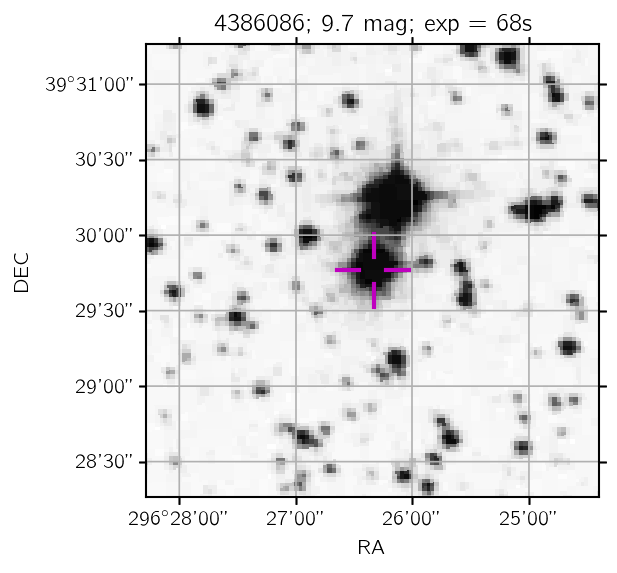

4484238
4484238 8.455975298557387 42.38365417980342 296.4359499859895 39.50364618833994

4142913
4142913 10.272294902086234 83.16884706258702 287.3292594903525 39.20024815431007
c


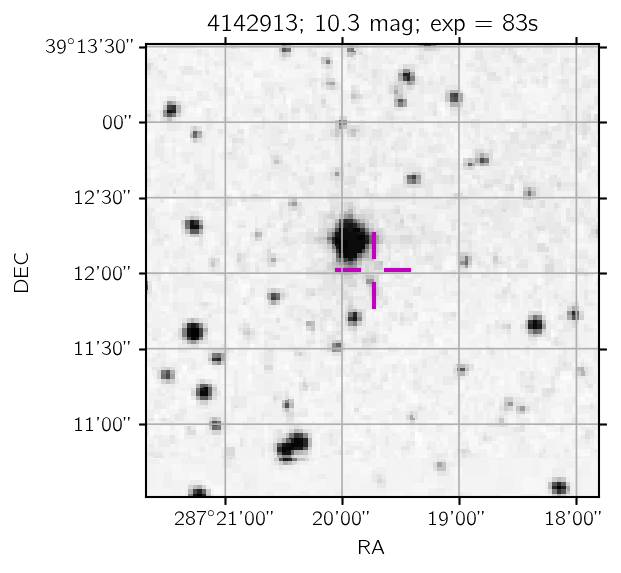

4043389
4043389 11.199476755152414 129.56441935036418 287.3814565414046 39.18016187074125
c


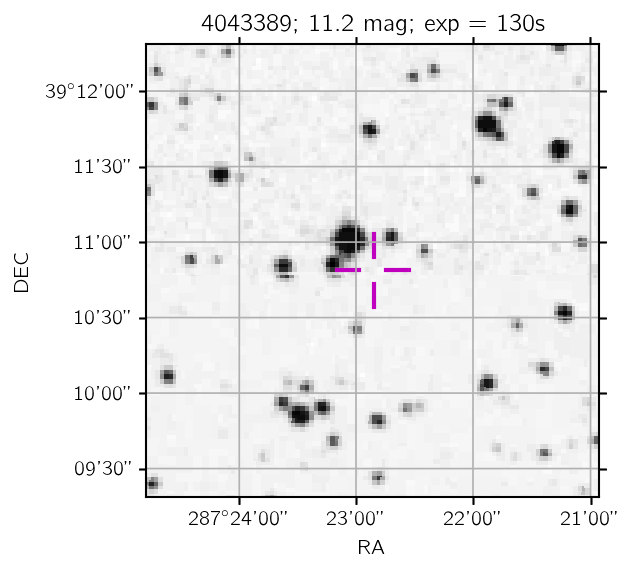

10230660
10230660 9.293470648791024 57.869412975820474 299.27625324907217 47.285410969232366

7832029
7832029 11.710049952923365 162.6029971754019 294.9917483058406 43.54482384865097
c


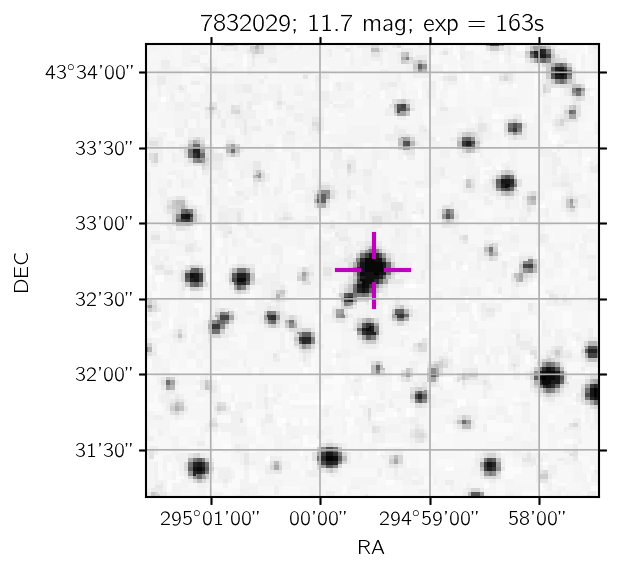

7539125
7539125 11.67455817560953 160.47349053657177 294.9854846924622 43.18050557899722

8838457
8838457 11.08296386732003 121.64154297776207 298.2889964677516 45.09824412657303

8771498
8771498 10.280354964442543 83.41064893327628 297.83014799709497 44.94472739428118

6225718
6225718 7.3817795851322465 28.817795851322465 297.32616307301663 41.581733434882786

6225816
6225816 10.236067192268813 82.08201576806438 297.349024781239 41.58895903282714

8241071
8241071 9.801712730079037 69.84453098205498 294.5374209202108 44.153719227581405
c


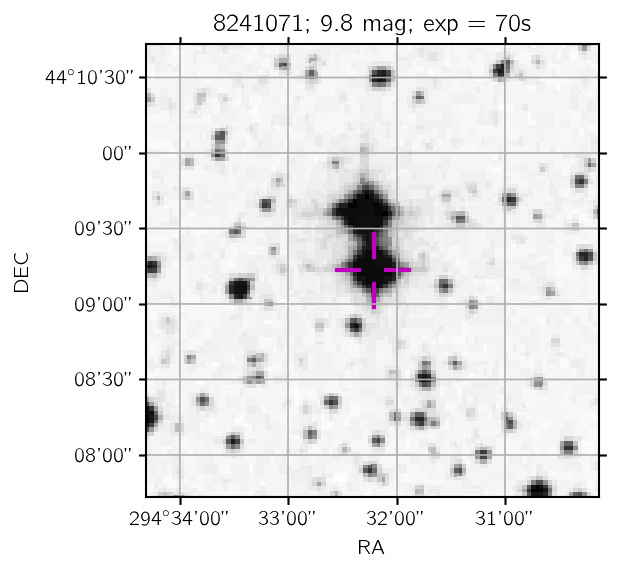

8241074
8241074 9.588559527840077 64.30254772384201 294.5387561137545 44.159813209617425

10603599
10603599 11.114033917762043 123.75430640781894 293.3164617388752 47.888083535736655
c


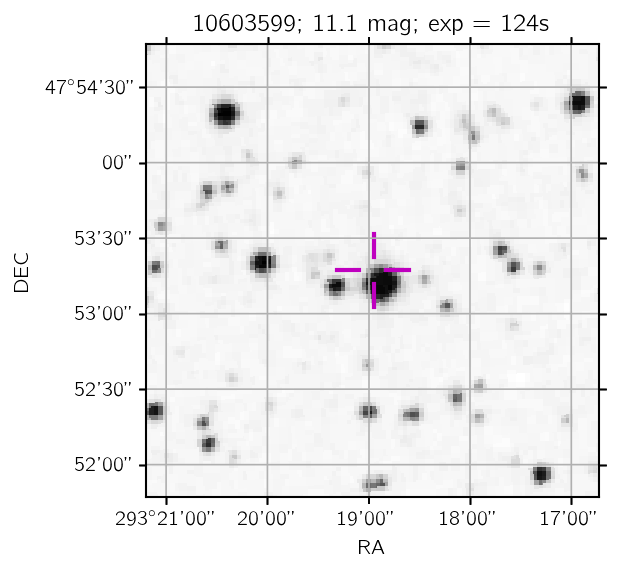

10473049
10473049 10.545039101800002 92.34203329360011 292.97863616809525 47.65351064952588

8042251
8042251 11.109842218901294 123.46927088528798 296.2487412687279 43.88147820315053

2305819
2305819 11.674929099163027 160.49574594978162 292.08057486234844 37.67464476680762

2021060
2021060 9.644414230643504 65.7547699967311 292.88529713863517 37.49747595977676

7450230
7450230 8.970115475174595 51.4620785531427 293.3914869301389 43.03587698517425

10487158
10487158 11.835087819532983 170.105269171979 297.6745481798825 47.65540617960632

10549821
10549821 10.884584500886962 109.99839404612204 297.1908640641314 47.79913810897753

9049593
9049593 10.308049379865071 84.24148139595215 299.79141223351064 45.39167958240057

8712683
8712683 11.395274540868215 142.8786687790386 299.19773314796953 44.8356512337811

9963499
9963499 11.821608906766832 169.2965344060099 296.64669130939967 46.881008834799964


KeyboardInterrupt: 

In [87]:
for _, row in targets.iterrows():
    kepid = row.kepid
    print(kepid)
    
    ra, dec = row.ra_x, row.dec_x
    mag = row.tgas_phot_g_mean_mag

#     if np.any(kepid == kic_tgas.kepid):
#         star = kic_tgas[kic_tgas.kepid == kepid].iloc[0]
#         ra, dec = star.ra, star.dec
#         mag = star.tgas_phot_g_mean_mag
#     else:
#         star = kic[kic.kepid == kepid].iloc[0]
#         ra, dec = star.ra, star.dec
#         mag = star.kepmag

    exp_time = float(mag2exp(mag))
    print(kepid, mag, exp_time, ra, dec)

    
    result = input()
    if result == "c":
        ax, _ = plot_finder_image(SkyCoord(ra=ra*u.degree, dec=dec*u.degree),
                                  fov_radius=3*u.arcmin, reticle=True)
        ax.set_title("{0}; {1:.1f} mag; exp = {2:.0f}s".format(kepid, mag, exp_time))
        plt.show()